# Exercise 3  
(with Matlab, from scratch)
- Going through this exercise, as guided by ex3.m


###    Jupyter Configuration Notes  
The dataset is pretty big to open for jupyter notebook.  Without any reconfiguration, you might get an error like below:   

>IOPub data rate exceeded.   
The notebook server will temporarily stop sending output  
to the client in order to avoid crashing it.   
To change this limit, set the config variable   
>>`--NotebookApp.iopub_data_rate_limit`.   
  
Current values:  
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)  
NotebookApp.rate_limit_window=3.0 (secs)  
  
__The solution__ to this problem is found [here](https://stackoverflow.com/questions/43490495/how-to-set-notebookapp-iopub-data-rate-limit-and-others-notebookapp-settings-in)  
Basically, when opening jupyter on the terminal, you need to fire it up with the following config:  
> jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000



### Section 1.   Multi-class Classification
  
In the first part of the exercise, we will extend previous implementation of logistic regression and apply it to one-vs-all classification.


In [1]:
%plot inline

The original dataset called ex3data1.mat has been converted into __predictors.txt__ and __responses.txt__ for this notebook. This dataset  contains 5000 training examples of handwritten digits.  
- There are 5000 training examples in the dataset, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is "unrolled" into a 400-dimensional vector. 
- Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.  
- The second part of the training set is a 5000-dimensional vector y that contains labels for the training set.

__Section 1.1.__ Loading the dataset

In [3]:
% Set some parameters 
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

% Load saved matrices from files
% The matrices X and y
X = load('./predictors.txt');
y = load('./responses.txt');

__Section 1.2.__  Visualizing the Data

In [4]:
% Randomly select 100 data points to display

m = size(X, 1);
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

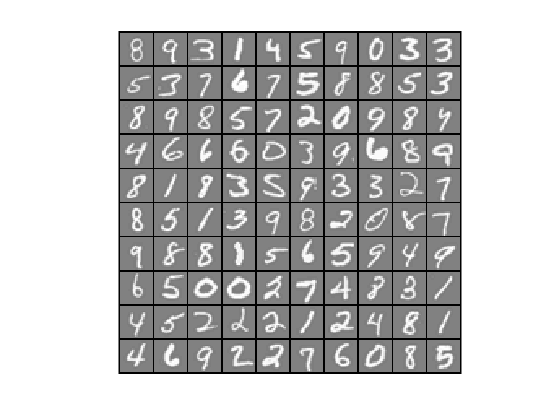

In [8]:
% Use the provided script to display the random 100 datapoints in dataset

displayData(sel);

In [7]:
% opengl info
opengl hardware

% This command fixes issues regarding low-level image rendering,
% which came up when displaying the data (above)

__Section 1.3.__ Vectorizing the Logistic Regression

In [1]:
% Test case for lrCostFunction

theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

fprintf('\nCost: %f\n', J);
fprintf('Expected cost: 2.534819\n');
fprintf('Gradients:\n');
fprintf(' %f \n', grad);
fprintf('Expected gradients:\n');
fprintf(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');




Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003



In [4]:
X_t
y_t


X_t =

    1.0000    0.1000    0.6000    1.1000
    1.0000    0.2000    0.7000    1.2000
    1.0000    0.3000    0.8000    1.3000
    1.0000    0.4000    0.9000    1.4000
    1.0000    0.5000    1.0000    1.5000


y_t =

  5×1 logical array

   1
   0
   1
   0
   1




__Section 1.4__ One-vs-All Classification  
- function saved in oneVsAll.m   
  
In this part of the exercise, you will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the K classes in our dataset (Figure 1). In the handwritten digits dataset,K = 10, but your code should work for any value of K.

In [11]:
fprintf('\nTraining One-vs-All Logistic Regression...\n')

lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);



Training One-vs-All Logistic Regression...
Iteration    50 | Cost: 1.376638e-02
Iteration    50 | Cost: 5.659163e-02
Iteration    50 | Cost: 6.287008e-02
Iteration    50 | Cost: 3.609963e-02
Iteration    50 | Cost: 6.268329e-02
Iteration    50 | Cost: 2.115408e-02
Iteration    50 | Cost: 3.414524e-02
Iteration    50 | Cost: 8.498836e-02
Iteration    50 | Cost: 8.047224e-02
Iteration    50 | Cost: 1.081830e-02



__Section 1.5__ Predict One-vs-All    
- function saved in predictOneVsAll.m
  
After training your one-vs-all classifier, you can now use it to predict the digit contained in a given image. For each input, you should compute the "probability" that it belongs to each class using the trained logistic regression classifiers. Your one-vs-all prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (1, 2,..., or K) as the prediction for the input example.

In [12]:
pred = predictOneVsAll(all_theta, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);




Training Set Accuracy: 94.940000



### Section 2. Neural Networks   
In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. For this week, you will be using parameters from a neural network that we have already trained. Your goal is to implement the feedforward propagation algorithm to use our weights for prediction. In next week's exercise, you will write the backpropagation algorithm for learning the neural network parameters.  
The following scripts are originally saved in ex3_nn.m


In [13]:
clear; close all; clc

In [14]:
% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)


__Section 2.1. Model representation__   
  
Our neural network is shown in Figure 2. It has 3 layers { an input layer, a hidden layer and an output layer. Recall that our inputs are pixel values of digit images. Since the images are of size 20x20, this gives us 400 input layer units (excluding the extra bias unit which always outputs +1). As before, the training data will be loaded into the variables X and y.

In [15]:
% Load saved matrices from files
% The matrices X and y
X = load('./predictors_nn.txt');
y = load('./responses_nn.txt');

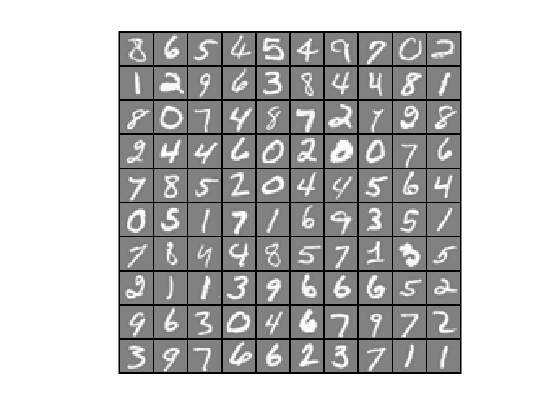

In [16]:
% Load Training Data
m = size(X,1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

In [17]:
% Loading Parameters Theta1 and 2

Theta1 = load('./theta1_nn.txt');
Theta2 = load('./theta2_nn.txt');


__Section 2.2__ Feedforward propagation and prediction  
You should implement the feedforward computation that computes $h_{\theta}(x^{(i)})$ for every example i and returns the associated predictions. Similar to the one-vs-all classification strategy, the prediction from the neural network will be the label that has the largest output $(h_{\theta}(x))_k$.

In [18]:
% Implement the predict function to predict the labels of the training set X
pred = predict(Theta1, Theta2, X);
fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 97.520000




Displaying Example Image

Neural Network Prediction: 6 (digit 6)

Displaying Example Image

Neural Network Prediction: 6 (digit 6)

Displaying Example Image

Neural Network Prediction: 9 (digit 9)

Displaying Example Image

Neural Network Prediction: 6 (digit 6)

Displaying Example Image

Neural Network Prediction: 2 (digit 2)

Displaying Example Image

Neural Network Prediction: 7 (digit 7)



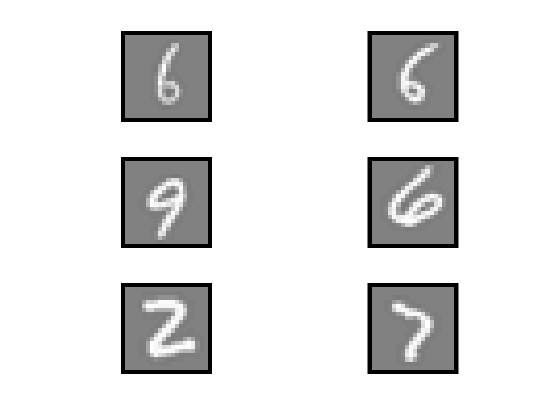

In [29]:
%  To give you an idea of the network's output, you can also run
%  through the examples one at the a time to see what it is predicting.

%  Randomly permute examples
m = size(X,1);
rp = randperm(m);

% displaying 6 exmaples
for i = 1:6
    subplot(3,2,i);
    
    % Display 
    fprintf('\nDisplaying Example Image\n');
    displayData(X(rp(i), :));

    pred = predict(Theta1, Theta2, X(rp(i),:));
    fprintf('\nNeural Network Prediction: %d (digit %d)\n', pred, mod(pred, 10));
    
    % Pause with quit option
%     s = input('Paused - press enter to continue, q to exit:','s');
%     if s == 'q'
%       break
%     end
end


